In [20]:
import seaborn as sns
import statsmodels.api as sm
from itertools import combinations
%matplotlib inline

In [28]:
md = pd.read_table('1250/ag_map_with_alpha.txt', index_col=0)

/Users/zech/miniconda3/envs/calour/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,66) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [29]:
md.country.value_counts()

USA                                     6634
United Kingdom                          2071
Australia                                280
Canada                                   136
Switzerland                               59
Germany                                   52
France                                    41
Sweden                                    20
Norway                                    20
not applicable                            19
Ireland                                   17
Netherlands                               17
Belgium                                   17
Italy                                     16
New Zealand                               11
Czech Republic                            11
Austria                                    9
Thailand                                   8
Spain                                      6
Morocco                                    6
Unspecified                                6
Japan                                      5
Slovakia  

In [30]:
md.head()

,barcode,center_name,center_project_name,comments_renamed,condition_renamed,experiment_center,experiment_design_description,experiment_title,extraction_robot,extractionkit_lot,...,vioscreen_vite_iu,vioscreen_vitk,vioscreen_water,vioscreen_wgrain,vioscreen_xylitol,vioscreen_zinc,seq_depth,observed_otus_1250,faiths_pd_1250,shannon_1250
#SampleID,,,,,,,,,,,,,,,,,,,,,
10317.000028848,CAAACGCACTAA,UCSDMI,AG19,Unspecified,Unspecified,UCSDMI,"fecal, saliva and skin samples from the Americ...",American Gut Project,Unspecified,Unspecified,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,17216.0,99.4,10.592146,4.888722
10317.000049761,TCCGGACTCCTG,UCSDMI,AG30,Unspecified,Unspecified,UCSDMI,"fecal, saliva, skin and environment samples fr...",American Gut Project,HOWE_KF4,PM16F14,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,11495.0,140.3,17.388163,4.794003
10317.000059054,ACACTCATTACT,UCSDMI,AG3dMouse,Unspecified,Unspecified,UCSDMI,"fecal, saliva, skin and environment samples fr...",American Gut Project,HOWE_KF1,PM16G13,...,14.132190704,409.529632568,3667.870849609,1.169561625,0.052383568,11.980276108,7729.0,120.4,12.345069,4.957398
10317.000030512,CTTTGATAATAA,UCSDMI,AG25,Unspecified,Unspecified,UCSDMI,"fecal, saliva, skin and environment samples fr...",American Gut Project,HOWE_KF2,PM15J26,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,1696.0,122.8,14.031922,5.355415
10317.000040165,CAGTCCCTGCAC,UCSDMI,AG28,Unspecified,Unspecified,UCSDMI,"fecal, saliva, skin and environment samples fr...",American Gut Project,HOWE_KF1,PM16B24,...,19.309343338,221.659484863,3198.077148438,3.229288101,0.054876719,10.327616692,11368.0,47.4,9.375266,3.817933


In [3]:
rare = ['1250','2500','5000','10000']

In [4]:
alpha = ['observed_otus', 'faiths_pd', 'shannon']

---- rarefaction level: 1250 
======== alpha div metric: observed_otus_1250
++++++++++++ gender: male
	USA vs United Kingdom
		t-statistic: -12.247571108943248 p-value: 7.865775676748737e-34 degree freedom: 3666.0
	USA vs Australia
		t-statistic: -2.894582035656071 p-value: 0.003824463267608759 degree freedom: 2955.0
	United Kingdom vs Australia
		t-statistic: 2.2449573821305377 p-value: 0.024995749215917015 degree freedom: 969.0
++++++++++++ gender: female
	USA vs United Kingdom
		t-statistic: -16.364736133209096 p-value: 1.6622870812530863e-58 degree freedom: 4472.0
	USA vs Australia
		t-statistic: -3.028041039384825 p-value: 0.002479731988021111 degree freedom: 3436.0
	United Kingdom vs Australia
		t-statistic: 3.1597760708745577 p-value: 0.0016149730989832864 degree freedom: 1312.0
======== alpha div metric: faiths_pd_1250
++++++++++++ gender: male
	USA vs United Kingdom
		t-statistic: -13.406364879962693 p-value: 4.798881646584364e-40 degree freedom: 3666.0
	USA vs Australia
		t-s

/Users/zech/miniconda3/envs/calour/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)




---- rarefaction level: 5000 
======== alpha div metric: observed_otus_5000
++++++++++++ gender: male
	USA vs United Kingdom
		t-statistic: -12.119779209088096 p-value: 4.9359489328358926e-33 degree freedom: 2969.0
++++++++++++ gender: female
	USA vs United Kingdom
		t-statistic: -15.202871319623078 p-value: 1.1549168103813257e-50 degree freedom: 3663.0
======== alpha div metric: faiths_pd_5000
++++++++++++ gender: male
	USA vs United Kingdom
		t-statistic: -12.82311000067408 p-value: 1.1238928653230862e-36 degree freedom: 2969.0
++++++++++++ gender: female
	USA vs United Kingdom
		t-statistic: -15.97986490691002 p-value: 1.2847265063448174e-55 degree freedom: 3663.0
======== alpha div metric: shannon_5000
++++++++++++ gender: male
	USA vs United Kingdom
		t-statistic: -6.99040522170953 p-value: 3.3712236108606778e-12 degree freedom: 2969.0
++++++++++++ gender: female
	USA vs United Kingdom
		t-statistic: -12.314396725825054 p-value: 3.56207371819791e-34 degree freedom: 3663.0


----

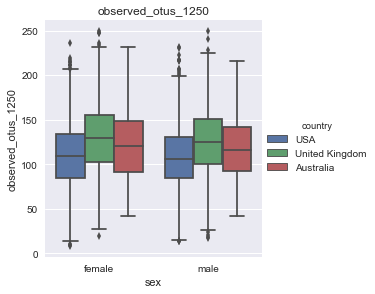

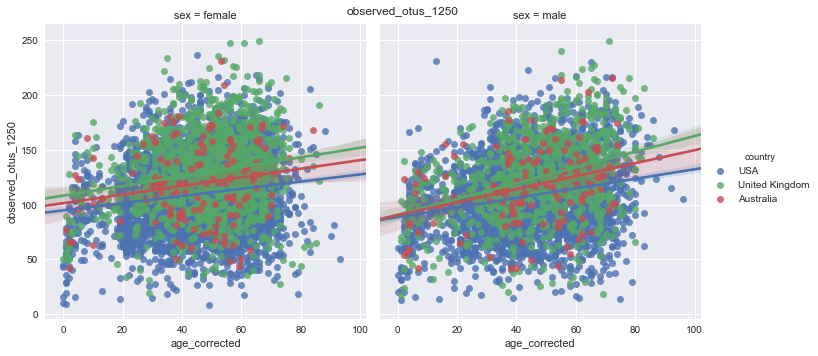

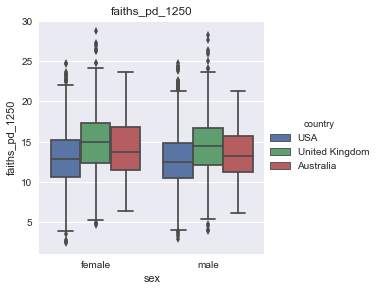

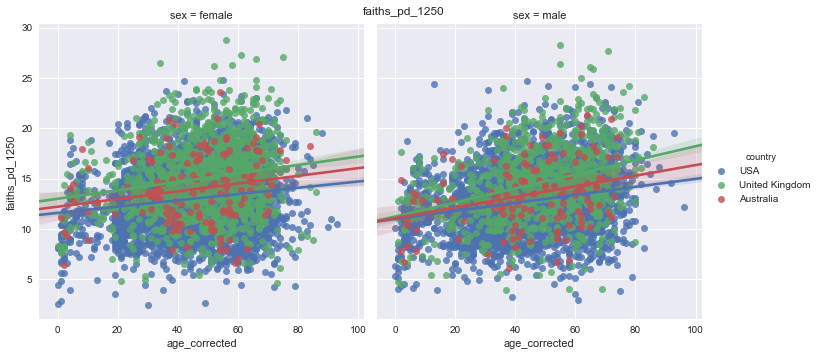

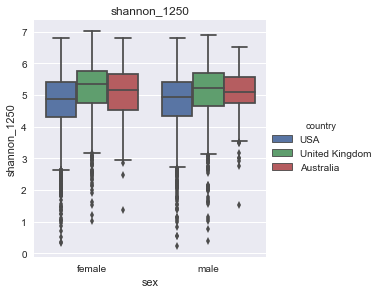

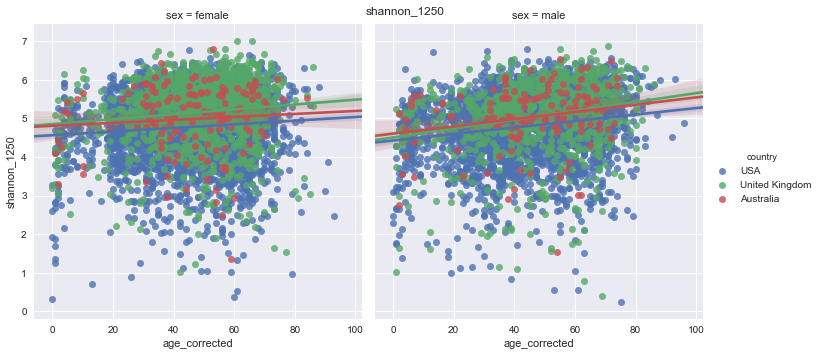

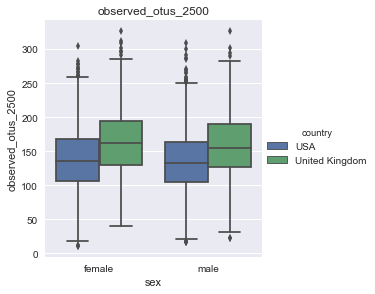

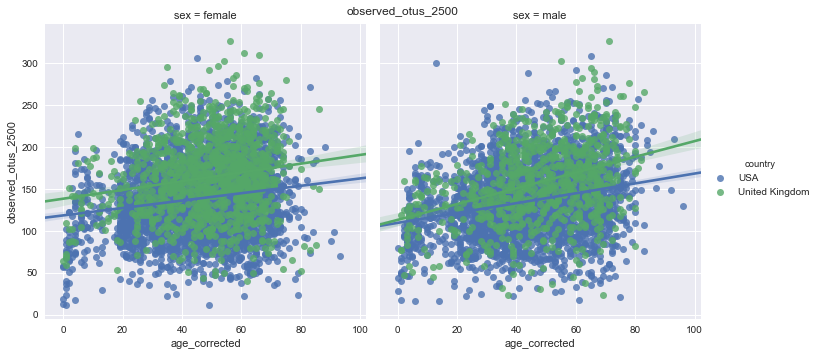

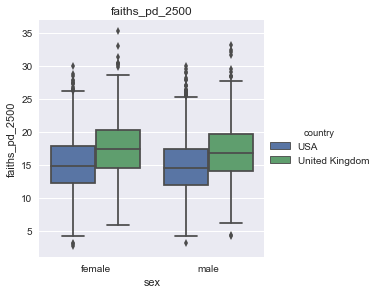

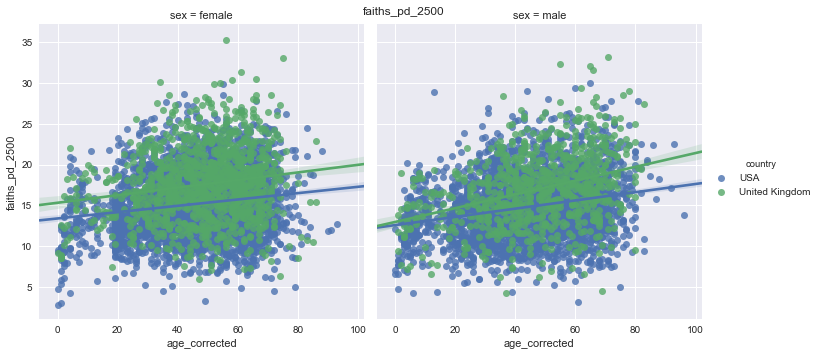

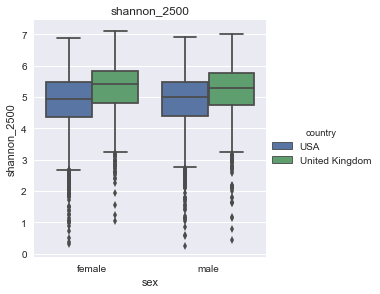

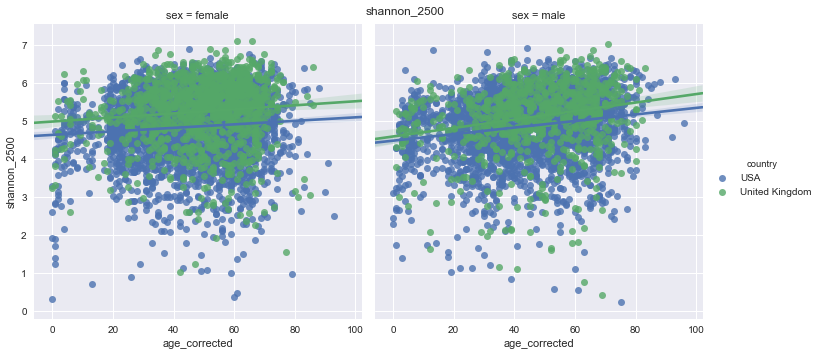

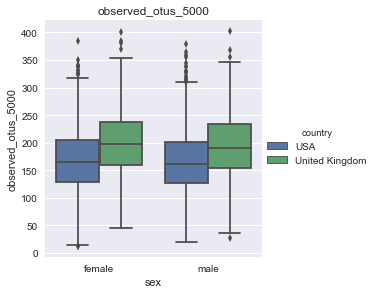

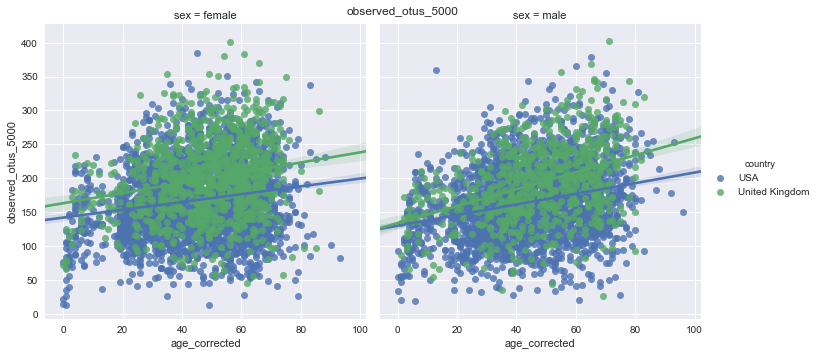

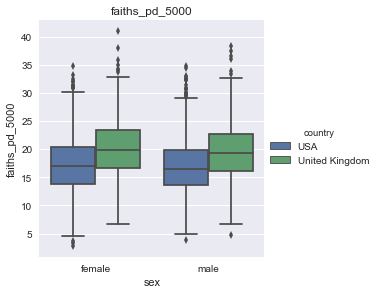

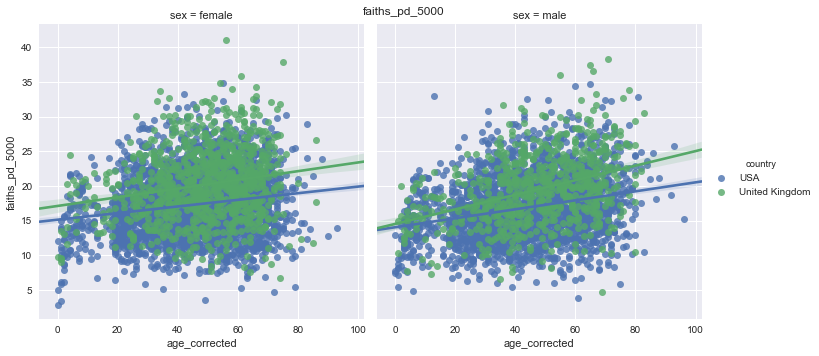

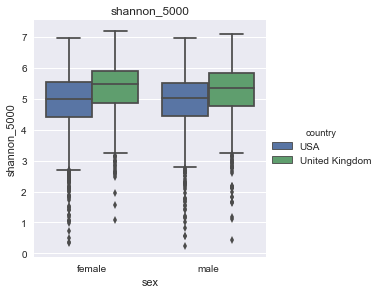

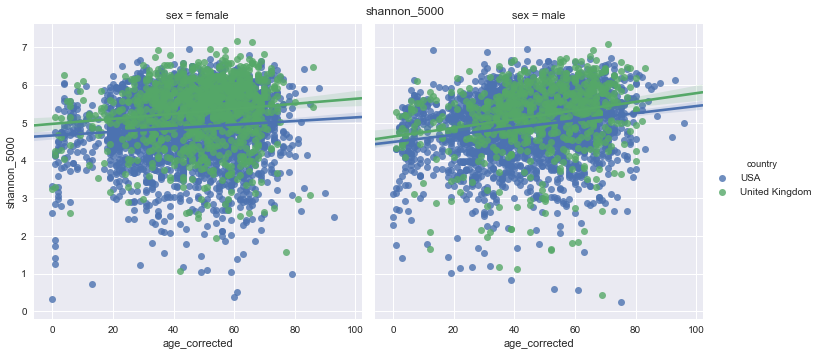

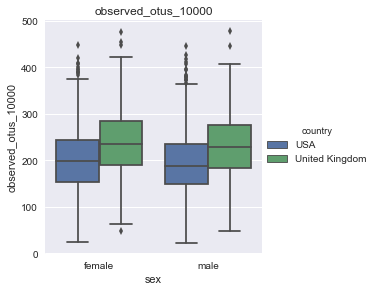

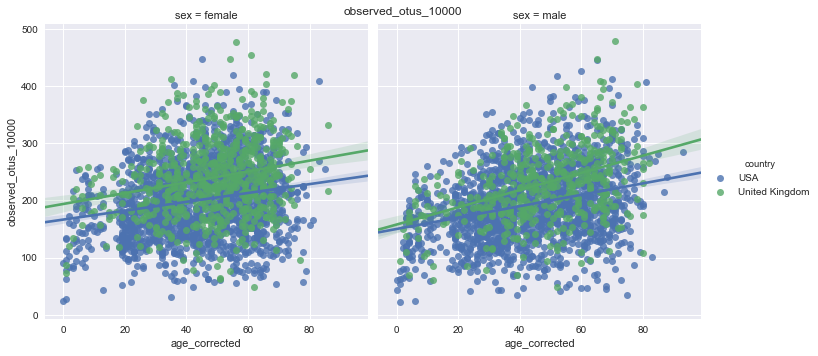

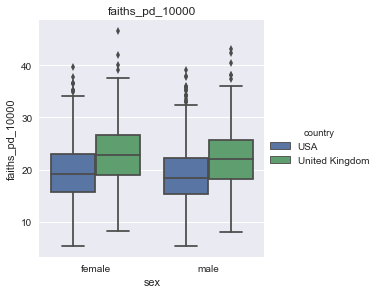

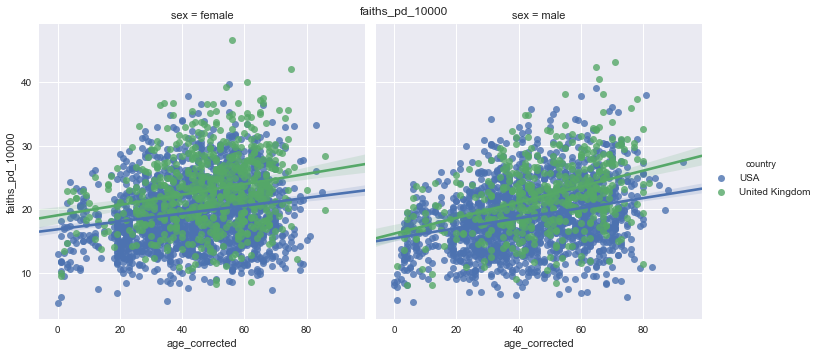

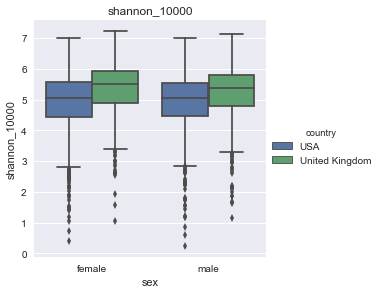

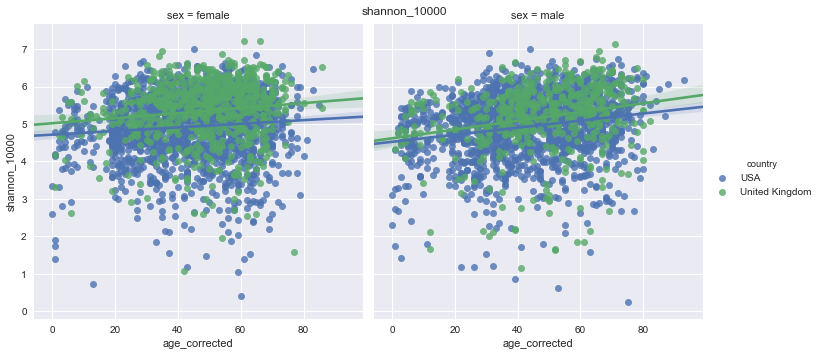

In [44]:
for r in rare:
    print('---- rarefaction level: %s ' % r)

    for a in alpha:
        md = pd.read_table(r + '/ag_map_with_alpha.txt', index_col=0, low_memory=False)

        md2 = md.query('age_corrected != "Unspecified" & sex in ["female", "male"]').astype({'age_corrected':int})
        # apparently some people are immortal and over 150 years old; filter them out
        md2 = md2.query('age_corrected < 100')

        x = md2.country.value_counts()
        countries = x.index[x > 250]
        md2 = md2.query('country in @countries')
        div = a + '_' + r
        if div in md2.columns:
            print('======== alpha div metric: %s' % div)
            for g in ['male', 'female']:
                print('++++++++++++ gender: %s' % g)
                for ci, cj in combinations(countries, 2):
                    x1 = md2.query('country == @ci & sex == @g')
                    x2 = md2.query('country == @cj & sex == @g')
                    stat = sm.stats.ttest_ind(x1[div], x2[div])
                    print('\t%s vs %s' % (ci, cj))
                    print('\t\tt-statistic: {0} p-value: {1} degree freedom: {2}'.format(*stat))
            plt.figure()
            fig=sns.factorplot(x="sex", y=div, hue="country", data=md2, kind='box')
            plt.title(div)
            plt.savefig(div + 'boxplot.pdf')
            plt.figure()
            fig=sns.lmplot(x='age_corrected', y=div, data=md2, hue='country', col='sex')
            plt.suptitle(div)
            plt.savefig(div + 'lmplot.pdf')
    print('\n')
